# <font color=red>Data Preprocessing</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from IPython.display import display
from sklearn import tree
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import GridSearchCV

In [4]:
banknote = pd.read_csv('banknote.csv')

In [5]:
banknote.head(10)

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.45860,-1.46210,0
1,3.86600,-2.6383,1.92420,0.10645,0
2,3.45660,9.5228,-4.01120,-3.59440,0
3,0.32924,-4.4552,4.57180,-0.98880,0
4,4.36840,9.6718,-3.96060,-3.16250,0
5,3.59120,3.0129,0.72888,0.56421,0
6,2.09220,-6.8100,8.46360,-0.60216,0
7,3.20320,5.7588,-0.75345,-0.61251,0
8,1.53560,9.1772,-2.27180,-0.73535,0
9,1.22470,8.7779,-2.21350,-0.80647,0


In [7]:
# Importing dataset
banknote = pd.read_csv('banknote.csv', header = None, names = ["variance","skewness","curtosis","entropy","class"])
banknote = banknote.drop_duplicates()
x = banknote.iloc[:,:-1]
display(x.isnull().sum())
y = banknote.iloc[:,-1]
display(y.isnull().sum())
display(banknote.head(10))
display(banknote.tail(10))
display(banknote.describe())
display(banknote.shape)

variance    0
skewness    0
curtosis    0
entropy     0
dtype: int64

0

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


,variance,skewness,curtosis,entropy,class
1362,-2.16680,1.59330,0.045122,-1.67800,1
1363,-1.16670,-1.42370,2.924100,0.66119,1
1364,-2.83910,-6.63000,10.484900,-0.42113,1
1365,-4.50460,-5.81260,10.886700,-0.52846,1
1366,-2.41000,3.74330,-0.402150,-1.29530,1
1367,0.40614,1.34920,-1.450100,-0.55949,1
1368,-1.38870,-4.87730,6.477400,0.34179,1
1369,-3.75030,-13.45860,17.593200,-2.77710,1
1370,-3.56370,-8.38270,12.393000,-1.28230,1
1371,-2.54190,-0.65804,2.684200,1.19520,1


,variance,skewness,curtosis,entropy,class
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000
mean,0.445785,1.909039,1.413578,-1.168712,0.452522
std,2.862906,5.868600,4.328365,2.085877,0.497925
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.786650,-1.627000,-1.545600,-2.393100,0.000000
50%,0.518735,2.334150,0.605495,-0.578890,0.000000
75%,2.853250,6.796025,3.199800,0.403863,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


(1348, 5)

# <font color=red>Question 1</font>

### What type of attributes of the data?

In [8]:
banknote.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1348 entries, 0 to 1371
Data columns (total 5 columns):
variance    1348 non-null float64
skewness    1348 non-null float64
curtosis    1348 non-null float64
entropy     1348 non-null float64
class       1348 non-null int64
dtypes: float64(4), int64(1)
memory usage: 63.2 KB


### Explore the data to check, whether is it balance?

In [9]:
banknote['class'].value_counts()

0    738
1    610
Name: class, dtype: int64

In [10]:
banknote['class'].value_counts()/banknote['class'].count()

0    0.547478
1    0.452522
Name: class, dtype: float64

<font color=green>It's not a 50:50 ratio but the the differences between the values are not so extreme (eg. 70:30) so I'll consider the dataset balance. The value of binary 0 is at 55% (738) while binary 1 is at 45% (610).<font>

### What attribute is useful and what is not? Why?

#### Here we will first plot the Pearson correlation heatmap and see the correlation of independent variables with the output variable "class". We will only select features which has correlation of above 0.1 (taking absolute value) with the output variable as value close to 0 implies no colleration

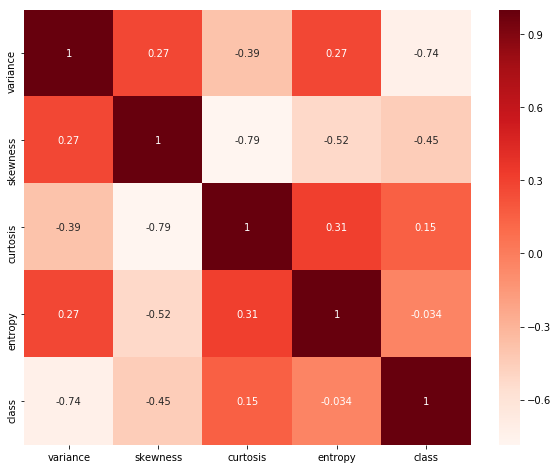

In [11]:
#Using Pearson Correlation
plt.figure(figsize=(10,8))
cor = banknote.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [12]:
#Correlation with output variable
cor_target = abs(cor["class"])
display(cor_target)
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
display(relevant_features)

variance    0.735185
skewness    0.449835
curtosis    0.154376
entropy     0.033979
class       1.000000
Name: class, dtype: float64

variance    0.735185
skewness    0.449835
curtosis    0.154376
class       1.000000
Name: class, dtype: float64

<font color=green>As we can see, the feature 'variance' as the higest and positively correlated with the class label. In general, the more wavelet transformed variance, the more probability of counterfeit banknotes. 'Entropy' has the lowest value which signifies low correlation close to 0. It should be noted however the feature could have correlation with the class label in a non-linear fashion. I decided to use heatmap for feature selection and seeing the correlation in this case because of the continuous attributes presented and the class label in binary value. Hence, I'll ignore the 'entropy' attribute.</font>

Ref: 
<br>https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
<br>https://www.neuraldesigner.com/learning/examples/banknote-authentication

# <font color=red>Question 2</font>

#### Default Parameter

In [13]:
x = banknote.iloc[:,0:3]
y = banknote.iloc[:,4:5]
from sklearn.model_selection import train_test_split
# split the data into training set and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=0)

In [15]:
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

The prediction accuracy is: 98.52%


Text(0.5,24,'Predicted label')

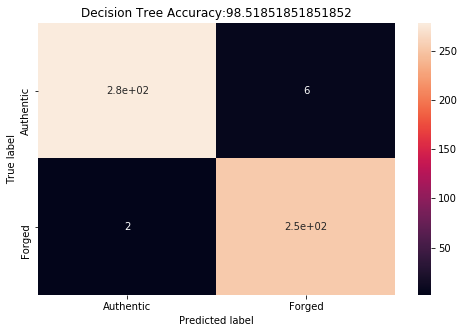

In [16]:
# input the decision tree classifier using "entropy" & train the model
dtree = DecisionTreeClassifier(criterion = 'entropy').fit(x_train, y_train)
# predict the classes of new, unseen data
predict = dtree.predict(x_test)
print("The prediction accuracy is: {0:2.2f}{1:s}".format(dtree.score(x_test,y_test)*100,"%"))
# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index =['Authentic','Forged'], columns = ['Authentic','Forged'])
# plot the confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(cm_df, annot=True)

plt.title("Decision Tree Accuracy:" + str(dtree.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

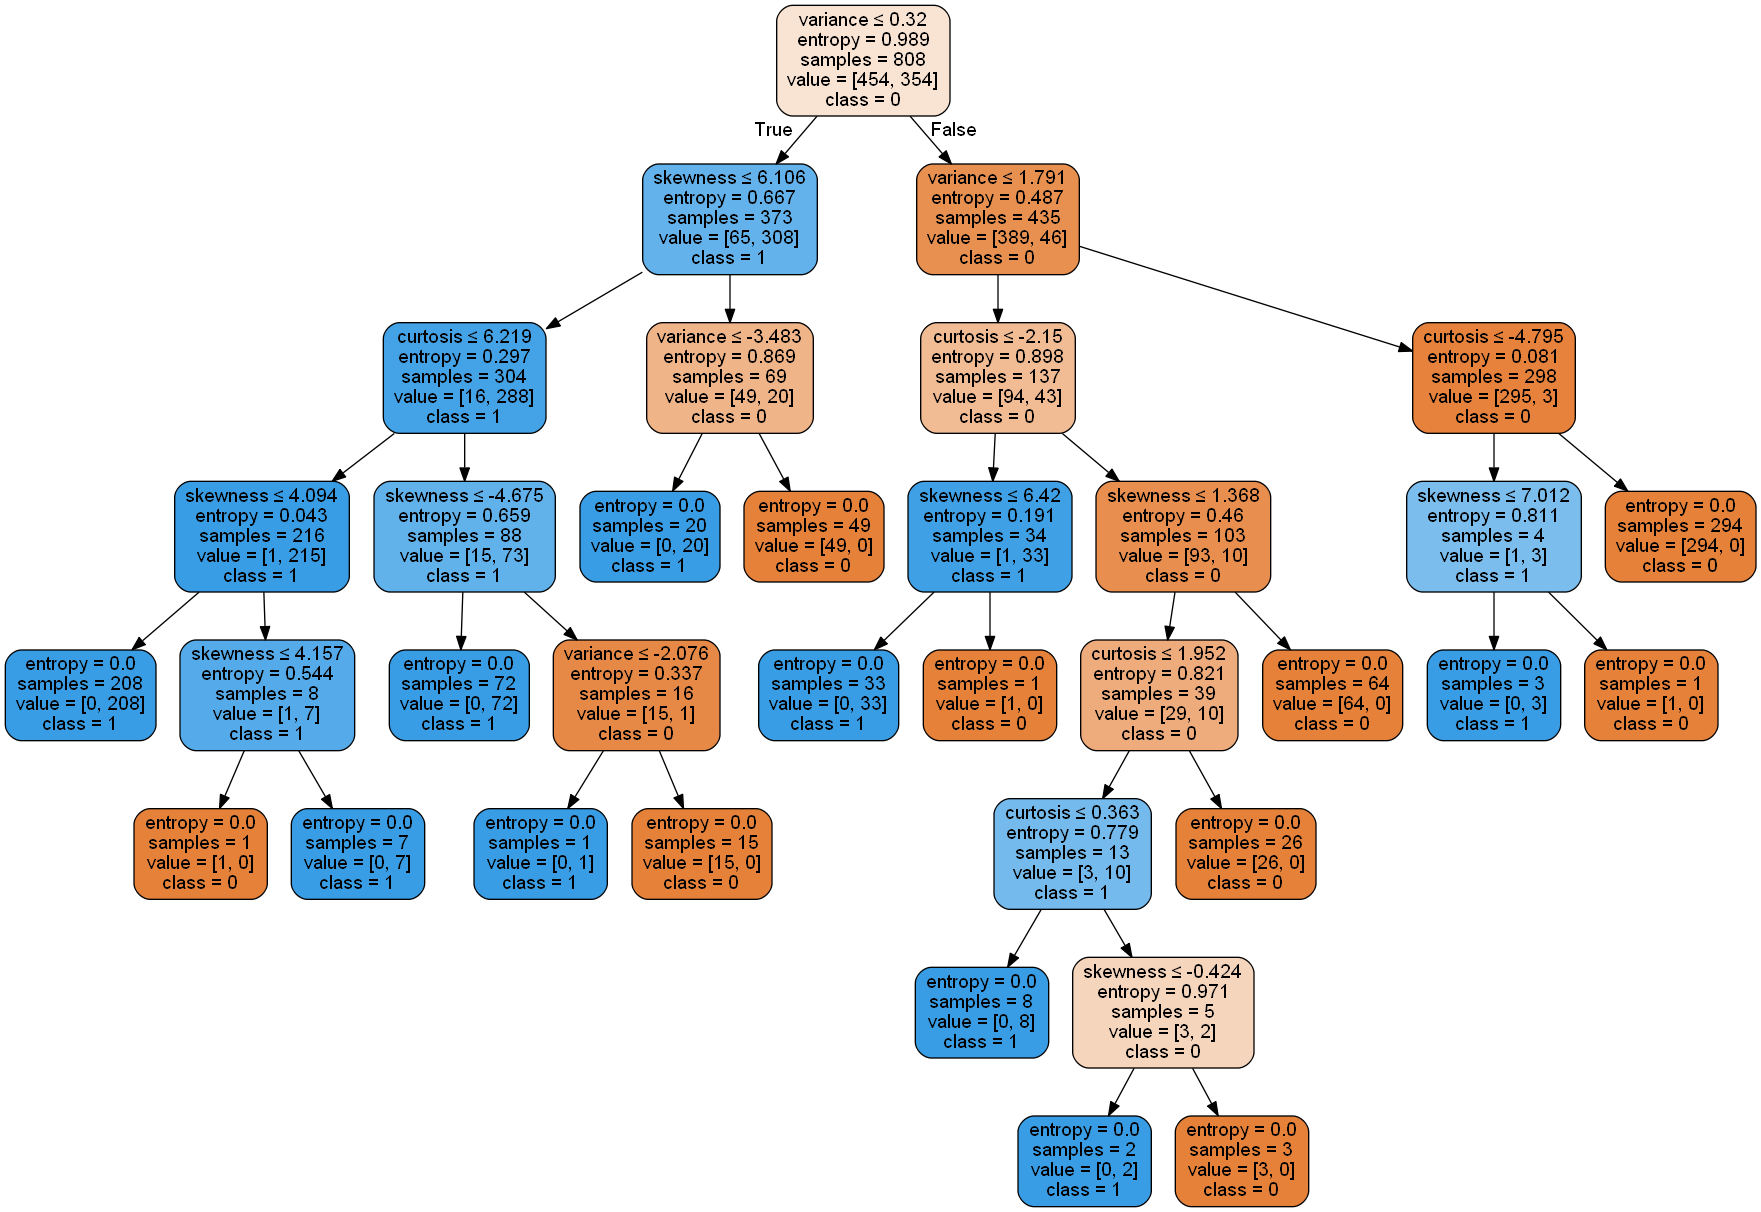

In [17]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
feature_cols = ["variance","skewness","curtosis"]
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = feature_cols, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### 5 fold cross-validation

In [31]:
scores=[]
dtc = DecisionTreeClassifier()
score = cross_val_score(dtc, x_train, y_train, cv=5, scoring='accuracy')
scores.append(score.mean())
    
print("The optimal score is %.4f" % max(scores))

The optimal score is 0.9839


In [33]:
parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=x, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_) 

0.9903560830860534 {'max_depth': 18}


<font color=green>Cross validation seems to decrease the performance in this case but it is very minimal.<font>

#### Try using 1 other parameter configurations and compare them to their default configuration.

The prediction accuracy is: 98.15%


Text(0.5,24,'Predicted label')

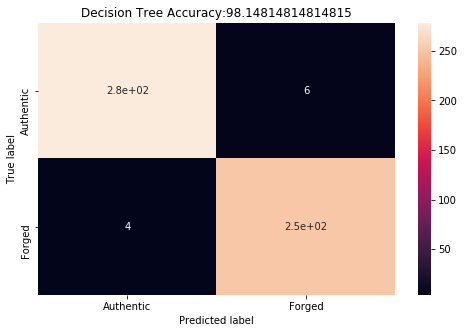

In [34]:
# input the decision tree classifier using "gini" for the Gini index & train the model
dtree = DecisionTreeClassifier(criterion = 'gini').fit(x_train, y_train)
# predict the classes of new, unseen data
predict = dtree.predict(x_test)
print("The prediction accuracy is: {0:2.2f}{1:s}".format(dtree.score(x_test,y_test)*100,"%"))
#Creates a confusion matrix
cm = confusion_matrix(y_test, predict)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index =['Authentic','Forged'], columns = ['Authentic','Forged'])
#plot the confusion matrix
plt.figure(figsize=(8,5))
sns.heatmap(cm_df, annot=True)

plt.title("Decision Tree Accuracy:" + str(dtree.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

<font color=green>The prediction accuracy is reduced by 0.37% using Gini index and there's 2 additional bank notes that are wrongly classified as authentic when it's actually forged<font>